In [1]:
import keras

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import pathlib

poke_path = pathlib.Path('/Users/deweirich/Desktop/pokemon/main-sprites/firered-leafgreen')

In [4]:
bulbasaur = mpimg.imread(open(poke_path / '1.png', 'rb'))

In [5]:
import numpy as np

In [6]:
pokemon = [
    mpimg.imread(open(poke_path / '{}.png'.format(i), 'rb')) for i in range(1, 152)
]

pokemon = np.array(pokemon)

In [7]:
input_dim = bulbasaur.shape
input_size = input_dim[0] * input_dim[1] * input_dim[2]

In [8]:
from keras.layers import Dense, Reshape
from keras import Sequential

In [9]:
model = Sequential()

model.add(Reshape((-1, ), input_shape=input_dim))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(input_size, activation='sigmoid'))
model.add(Reshape(input_dim))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 16384)             2113536   
_________________________________________________________________
reshape_2 (Reshape)          (None, 64, 64, 4)         0         
Total params: 4,227,392
Trainable params: 4,227,392
Non-trainable params: 0
____________________________________________

In [182]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [183]:
model.fit(pokemon, pokemon, epochs=75)

Epoch 1/75
151/151 [==============================] - 0s 3ms/step - loss: 0.6539
Epoch 2/75
151/151 [==============================] - 0s 1ms/step - loss: 0.4539
Epoch 3/75
151/151 [==============================] - 0s 2ms/step - loss: 0.3851
Epoch 4/75
151/151 [==============================] - 0s 2ms/step - loss: 0.3588
Epoch 5/75
151/151 [==============================] - 0s 2ms/step - loss: 0.3360
Epoch 6/75
151/151 [==============================] - 0s 2ms/step - loss: 0.3274
Epoch 7/75
151/151 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 8/75
151/151 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 9/75
151/151 [==============================] - 0s 1ms/step - loss: 0.3056
Epoch 10/75
151/151 [==============================] - 0s 1ms/step - loss: 0.3028
Epoch 11/75
151/151 [==============================] - 0s 1ms/step - loss: 0.3008
Epoch 12/75
151/151 [==============================] - 0s 1ms/step - loss: 0.2989
Epoch 13/75
151/151 [====

In [184]:
from keras import Input

input_layer = Input(shape=pokemon[0].shape)
encoder_0 = model.layers[0]
encoder_1 = model.layers[1]
encoder_2 = model.layers[2]
decoder_1 = model.layers[3]
decoder_2 = model.layers[4]
output_layer = model.layers[5]

In [185]:
from keras import Model

encoder = Model(input_layer, encoder_2(encoder_1(encoder_0(input_layer))))

encoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 64, 64, 4)         0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 16384)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
Total params: 2,105,536
Trainable params: 2,105,536
Non-trainable params: 0
_________________________________________________________________


In [187]:
decoder_input = Input((64, ))
decoder = Model(decoder_input, output_layer(decoder_2(decoder_1(decoder_input))))

decoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 16384)             2113536   
_________________________________________________________________
reshape_17 (Reshape)         (None, 64, 64, 4)         0         
Total params: 2,121,856
Trainable params: 2,121,856
Non-trainable params: 0
_________________________________________________________________


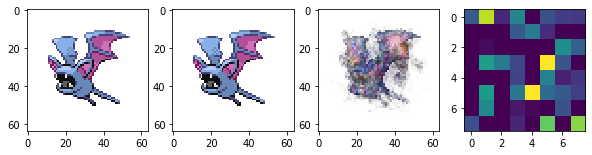

In [241]:
i = 40

original = pokemon[i].reshape(bulbasaur.shape)

noisy = original# + np.random.normal(size=(64, 64, 1), loc=0.5, scale=.0001)
noisy = np.clip(noisy, 0, 1)
encoded = encoder.predict(noisy.reshape(1, *bulbasaur.shape)).reshape(8, 8)
decoded = model.predict(noisy.reshape(1, *bulbasaur.shape)).reshape(bulbasaur.shape)

plt.figure(1, figsize=(10, 10))
plt.subplot(141)
plt.imshow(original)

plt.subplot(142)
plt.imshow(noisy)

plt.subplot(143)
plt.imshow(decoded)

plt.subplot(144)
plt.imshow(encoded)

plt.show()

In [178]:
v = np.random.random(size=(1, 16))

ValueError: operands could not be broadcast together with shapes (1,16) (64,64,4) 